In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from util import getBinaryData, sigmoid, sigmoid_cost, error_rate, relu
from util import getData

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

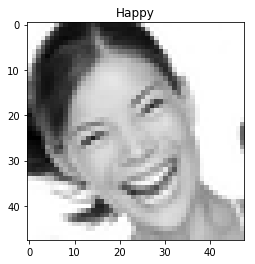

In [8]:
def main():
    X, Y = getData(balanced_ones=False)
    
    i = 3
    X, Y = X[Y==i], Y[Y==i]
    N = len(Y)
    j = np.random.choice(N)
    plt.imshow(X[j].reshape(48,48), cmap='gray')
    plt.title(label_map[Y[j]])
    plt.show()
    
main()

In [15]:
class ANN(object):
    def __init__(self, M):
        self.M = M # number of hidden units
    
    def fit(self, X, Y, learning_rate=1.0e-7, reg=1.0, epochs=10000, show_fig=False):
        X, Y = shuffle(X, Y)
        # training and validation
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        
        N, D = X.shape
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D+self.M)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M) / np.sqrt(self.M)
        self.b2 = 0
        
        costs = []
        best_validation_error = 1
        for i in range(epochs):
            # forward propagation and cost
            pY, Z = self.forward(X)
            
            # gradient descent
            pY_Y = pY - Y
            self.W2 -= learning_rate*( Z.T.dot(pY_Y) + reg*self.W2 )
            self.b2 -= learning_rate*( (pY_Y).sum() + reg*self.b2 )
            dZ = np.outer(pY_Y,self.W2) * (1-Z*Z)
            self.W1 -= learning_rate*( X.T.dot(dZ) + reg*self.W1 )
            self.b1 -= learning_rate*( np.sum(dZ, axis=0) + reg*self.b1 )
            
            if i%500==0:
                pYvalid, _ = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.round(pYvalid))
                print("i: ", i, "   cost: ", c, "   error: ", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()
            
    def forward(self, X):
        #Z = relu(X.dot(self.W1)+self.b1)
        Z = np.tanh( X.dot(self.W1)+self.b1 )
        return sigmoid( Z.dot(self.W2)+self.b2 ), Z
    
    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

i:  0    cost:  763.155533548    error:  0.516
i:  500    cost:  669.363685919    error:  0.363
i:  1000    cost:  655.592841264    error:  0.346
i:  1500    cost:  645.43084567    error:  0.323
i:  2000    cost:  637.483018309    error:  0.328
i:  2500    cost:  631.060194313    error:  0.328
i:  3000    cost:  625.706927362    error:  0.332
i:  3500    cost:  621.12677671    error:  0.342
i:  4000    cost:  617.152638321    error:  0.339
i:  4500    cost:  613.668114638    error:  0.338
i:  5000    cost:  610.550681892    error:  0.338
i:  5500    cost:  607.69983495    error:  0.336
i:  6000    cost:  605.047744046    error:  0.326
i:  6500    cost:  602.548369511    error:  0.32
i:  7000    cost:  600.168501956    error:  0.321
i:  7500    cost:  597.883069287    error:  0.322
i:  8000    cost:  595.672675273    error:  0.323
i:  8500    cost:  593.522140299    error:  0.317
i:  9000    cost:  591.419518399    error:  0.317
i:  9500    cost:  589.355378654    error:  0.312
best_val

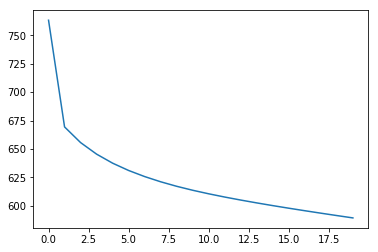

In [16]:
X, Y = getBinaryData()

X0 = X[Y==0, :]
X1 = X[Y==1, :]
X1 = np.repeat(X1, 9, axis=0)
X = np.vstack([X0, X1])
Y = np.array([0]*len(X0) + [1]*len(X1))
    
model = ANN(100)
model.fit(X, Y, show_fig=True)

In [17]:
from util import getData, softmax, cost, y2indicator, error_rate, 


class LogisticModel(object):
    def __init__(self):
        pass

    def fit(self, X, Y, learning_rate=10e-8, reg=10e-12, epochs=10000, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        Tvalid = y2indicator(Yvalid)
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W = np.random.randn(D, K) / np.sqrt(D + K)
        self.b = np.zeros(K)

        costs = []
        best_validation_error = 1
        for i in xrange(epochs):
            # forward propagation and cost calculation
            pY = self.forward(X)

            # gradient descent step
            self.W -= learning_rate*(X.T.dot(pY - T) + reg*self.W)
            self.b -= learning_rate*((pY - T).sum(axis=0) + reg*self.b)

            if i % 1000 == 0:
                pYvalid = self.forward(Xvalid)
                c = cost(Tvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i: ", i, "   cost: ", c, "   error: ", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error:", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()


    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)

    def predict(self, X):
        pY = self.forward(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)


In [18]:
X, Y = getData()
    
model = LogisticModel()
model.fit(X, Y, show_fig=True)
print(model.score(X, Y))

NameError: name 'xrange' is not defined

In [ ]:
from util import getData, softmax, cost2, y2indicator, error_rate, relu
from sklearn.utils import shuffle


class ANN(object):
    def __init__(self, M):
        self.M = M

    # learning rate 10e-6 is too large
    def fit(self, X, Y, learning_rate=10e-7, reg=10e-7, epochs=10000, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        # Tvalid = y2indicator(Yvalid)
        X, Y = X[:-1000], Y[:-1000]

        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D + self.M)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M, K) / np.sqrt(self.M + K)
        self.b2 = np.zeros(K)

        costs = []
        best_validation_error = 1
        for i in xrange(epochs):
            # forward propagation and cost calculation
            pY, Z = self.forward(X)

            # gradient descent step
            pY_T = pY - T
            self.W2 -= learning_rate*(Z.T.dot(pY_T) + reg*self.W2)
            self.b2 -= learning_rate*(pY_T.sum(axis=0) + reg*self.b2)
            # dZ = pY_T.dot(self.W2.T) * (Z > 0) # relu
            dZ = pY_T.dot(self.W2.T) * (1 - Z*Z) # tanh
            self.W1 -= learning_rate*(X.T.dot(dZ) + reg*self.W1)
            self.b1 -= learning_rate*(dZ.sum(axis=0) + reg*self.b1)

            if i % 1000 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = cost2(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i :", i, "   cost: ", c, " error:   ", e)
                if e < best_validation_error:
                    best_validation_error = e
        print("best_validation_error: ", best_validation_error)

        if show_fig:
            plt.plot(costs)
            plt.show()


    def forward(self, X):
        # Z = relu(X.dot(self.W1) + self.b1)
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return softmax(Z.dot(self.W2) + self.b2), Z

    def predict(self, X):
        pY, _ = self.forward(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)
    
model = ANN(200)
model.fit(X, Y, reg=0, show_fig=True)
print(model.score(X, Y))
# scores = cross_val_score(model, X, Y, cv=5)
# print "score mean:", np.mean(scores), "stdev:", np.std(scores)
    